<h1 style="text-align:center;">TF2202 Teknik Komputasi - Persamaan Diferensial Parsial</h1>
<h3 style="text-align:center;">Fadjar Fathurrahman</h3>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

In [3]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats("svg")

In [6]:
import matplotlib
#matplotlib.style.use("dark_background")
matplotlib.style.use("default")

In [7]:
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm

In [8]:
import matplotlib.animation as animation

In [24]:
import IPython.display

# Persamaan Kalor 1d

Dalam satu dimensi spasial (misalkan x).

$$
\alpha \frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

Domain:
- spasial: $0 \leq x \leq x_{f}$
- temporal: $0 \leq t \leq t_{f}$.

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_f}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$ 

Catatan: persamaan yang sama juga digunakan untuk menjelaskan fenomena difusi.

## Metode Euler Eksplisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan forward difference.

Dengan menggunakan notasi berikut:
- $u(x,t) = u^{k}_{i}$
- $u(x+\Delta x,t) = u^{k}_{i+1}$
- $u(x-\Delta x,t) = u^{k}_{i-1}$
- $u(x,t+\Delta t) = u^{k+1}_{i}$
- $u(x,t-\Delta t) = u^{k-1}_{i}$

dapat dituliskan:

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

Dengan menggunakan defisi:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Persamaan ini dapat dipecahkan untuk mendapatkan $u^{k+1}_{i}$

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + (1 - 2r) u^{k}_{i} 
$$

untuk $i = 1, 2, \ldots, N_{x}-1$.

Dapat ditunjukkan bahwa skema ini akan stabil jika:

$$
r = \alpha \frac{\Delta t}{(\Delta x)^2} \leq \frac{1}{2}
$$

### Implementasi

In [9]:
def heat_1d_euler_exp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) )

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    if r > 0.5:
        print("heat_1d_euler_exp:")
        print("WARNING: r lebih besar dari 0.5: %f\n" % r)
        print("WARNING: solusi tidak stabil !!")
    else:
        print("heat_1d_euler_exp:")
        print("r = %f >= 0.5\n" % r)
        print("Solusi seharusnya stabil")

    for k in range(0,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + (1 - 2*r)*u[i,k]
    
    return u, x, t

### Contoh

Cari solusi numerik persamaan kalor:
$$
\frac{\partial^{2}}{\partial x^2} u(x,t) = \frac{\partial}{\partial t} u(x,t)
$$

pada domain:
- spasial: $0 \leq x \leq 1$
- temporal: $0 \leq t \leq 0.1$.

Syarat batas:
- $u(0,t) = 0$
- $u(1,t) = 0$

Syarat awal:
- $u(x,0) = \sin(\pi x)$ 

Bandingkan dengan solusi analitik:
$$
u(x,t) = \sin(\pi x) \exp(-\pi^2 t)
$$

In [10]:
# Syarat awal
def initial_temp( x ):
    return np.sin(np.pi*x)
# Syarat batas kiri
def bx0( t ):
    return 0.0
# Syarat batas kanan
def bxf( t ):
    return 0.0

In [11]:
def sol_01_analitik(x,t):
    return np.sin(np.pi*x)*np.exp(-np.pi**2 * t)

#### Kasus solusi stabil

In [12]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 25
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.312500 >= 0.5

Solusi seharusnya stabil


Plot hasilnya untuk beberapa nilai t.

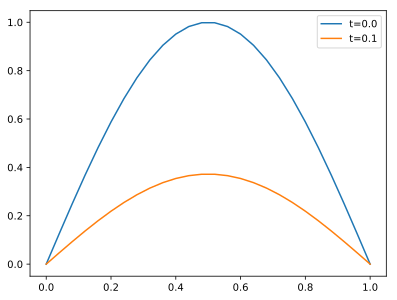

In [13]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

Perbandingan dengan solusi analitik.

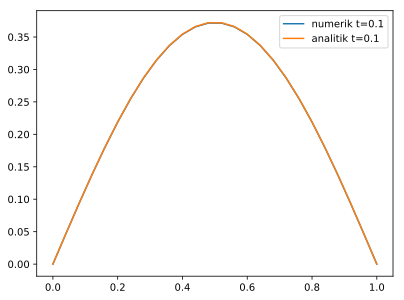

In [14]:
plt.clf()
plt.plot(x_exp, u_exp[:,-1], label="numerik t="+str(t_exp[-1]))
plt.plot(x_exp, sol_01_analitik(x_exp, t_exp[-1]), label="analitik t="+str(t_exp[-1]))
plt.legend();

Animasi

In [76]:
def create_anim_2d(y, x, t, ymin, ymax):
    plt.clf()
    fig, ax = plt.subplots()
    plt.ylim(ymin, ymax)
    k = 0
    line, = ax.plot(x, y[:,k])

    time_template = "t = %.5f"
    time_text = ax.text(0.8, 0.9, "", transform=ax.transAxes)

    def init():
        line.set_xdata(x)
        line.set_ydata(y[:,0])
        time_text.set_text(time_template % t[0])
        return line, time_text

    def animate(k):
        line.set_xdata(x)
        line.set_ydata(y[:,k])
        time_text.set_text(time_template % t[k])
        return line, time_text

    anim = animation.FuncAnimation(fig, animate, init_func=init, interval=len(t), blit=True,
                                   frames=len(t));
    return anim

In [ ]:
anim = create_anim_2d(u_exp, x_exp, t_exp, 0.0, 1.1)

In [79]:
IPython.display.HTML( anim.to_html5_video() )

Tulis ke file:

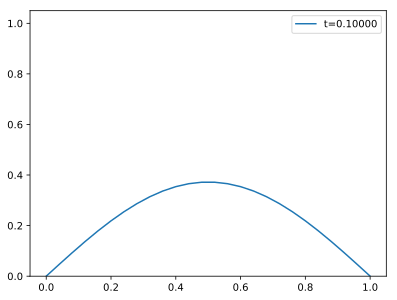

In [15]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+format("%.5f" % t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig(format("TEMP_%04d.png" % (k)))

#### Kasus solusi tidak stabil

In [14]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:



Plot untuk beberapa nilai t (paling awal dan paling akhir) 

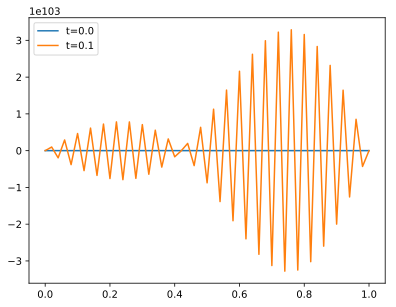

In [15]:
plt.clf()
plt.plot( x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot( x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

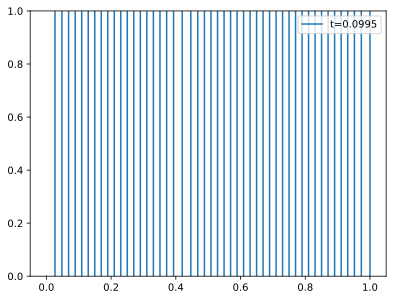

In [16]:
for k in range(Nt):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+str(t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.0)
    plt.savefig("TEMP_t_" + str(k) + ".png")

### Coba lagi

In [17]:
# Dari soal atau masalah yang diberikan
alpha = 1.0
xf = 1.0
tf = 0.1

# ditentukan pengguna
Nx = 50
Nt = 500

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:
r = 0.500000 >= 0.5

Solusi seharusnya stabil


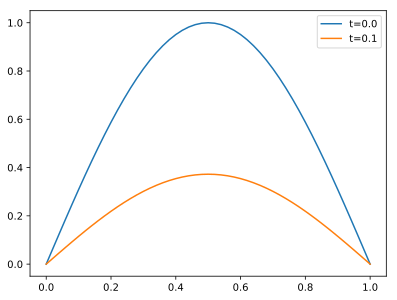

In [18]:
plt.clf()
plt.plot( x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot( x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.legend();

## Metode Euler implisit

Domain spasial dibagi menjadi $N_{x}$ segmen dengan $\Delta x = x_{f}/N_{x}$.

Domain temporal dibagi menjadi $N_{t}$ segmen dengan $\Delta t = t_{f}/N_{t}$.

Turunan parsial kedua terhadap $x$ diaproksimasi dengan menggunakan central difference.

Turunan parsial pertama terhadap $t$ diaproksimasi dengan backward difference.

$$
\alpha \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
=
\frac{u^{k}_{i} - u^{k-1}_{i}}{\Delta t}
$$

Dengan menggunakan notasi:
$$
r = \alpha \frac{\Delta t}{(\Delta x)^2}
$$

Diperoleh persamaan implisit:
$$
-ru^{k}_{i-1}+ (1 + 2r)u^{k}_{i} - ru^{k}_{i+1} = u^{k-1}_{i}
$$
untuk $i = 1, 2, \ldots, N_{x}-1$.

Dalam bentuk matriks:
$$
\begin{bmatrix}
1 + 2r & -r & 0 & \cdot & 0 & 0 \\
-r & 1 + 2r & -r & \cdot & 0 & 0 \\
0 & -r & 1 + 2r & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 1 + 2r & -r \\
0 & 0 & 0 & \cdot & -r & 1 + 2r
\end{bmatrix}
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{N_{x}-2} \\
u^{k}_{N_{x}-1}
\end{bmatrix} = 
\begin{bmatrix}
u^{k-1}_{1} + ru^{k}_{0} \\
u^{k-1}_{2} \\
u^{k-1}_{3} \\
\cdot \\
u^{k-1}_{N_{x}-2} \\
u^{k-1}_{N_{x}-1} + ru^{k}_{N_{x}}
\end{bmatrix}
$$

### Implementasi

Dalam kode di bawah ini akan didefinisikan matriks $\mathbf{A}$ sebagai matriks koefisien pada ruas kiri dan vektor $\mathbf{b}$ pada ruas kanan.

In [81]:
def heat_1d_euler_imp( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    # Bangun matriks A
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 1 + 2*r
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r
    
    # Bangun vektor b
    b = np.zeros(Nx-1)
    for k in range(1,Nt+1):
        b = np.copy(u[1:Nx,k-1])
        b[0] = b[0] + r*u[0,k]
        b[Nx-2] = b[Nx-2] + r*u[Nx,k]
        # Selesaikan sistem persamaan linear
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

Untuk parameter-parameter berikut, metode eksplisit stabil.

In [20]:
alpha = 1.0

# dari soal (deskripsi masalah)
xf = 1.0
tf = 0.1

# dari pengguna
Nx = 25
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

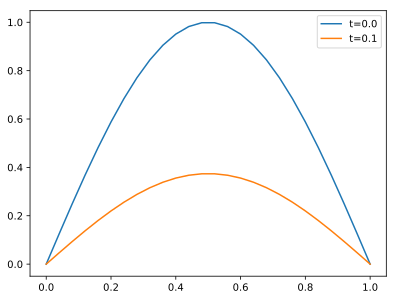

In [21]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

Untuk parameter-parameter berikut ini, metode eksplisit tidak stabil.

Bagaimana untuk metode implisit?

In [22]:
alpha = 1.0

xf = 1.0
tf = 0.1

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

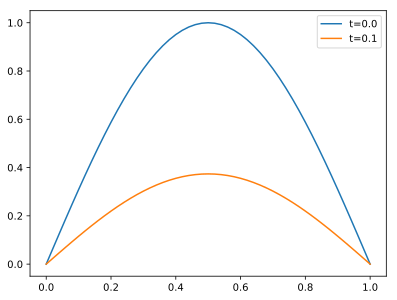

In [23]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

In [24]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

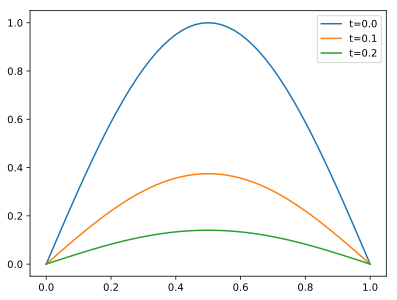

In [25]:
plt.clf()
plt.plot(x_imp, u_imp[:,0], label="t="+str(t_imp[0]))
plt.plot(x_imp, u_imp[:,100], label="t="+str(t_imp[100]))
plt.plot(x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]))
plt.legend();

In [26]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_exp, x_exp, t_exp = heat_1d_euler_exp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

heat_1d_euler_exp:



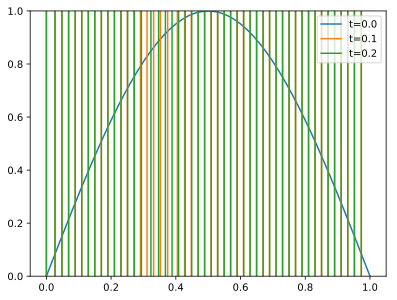

In [27]:
plt.clf()
plt.plot(x_exp, u_exp[:,0], label="t="+str(t_exp[0]))
plt.plot(x_exp, u_exp[:,100], label="t="+str(t_exp[100]))
plt.plot(x_exp, u_exp[:,-1], label="t="+str(t_exp[-1]))
plt.ylim(0.0, 1.0)
plt.legend();

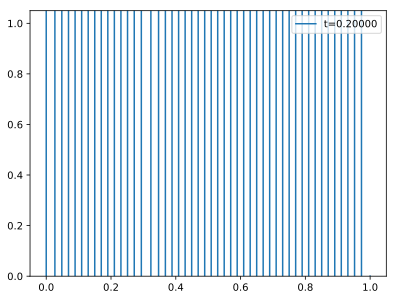

In [28]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_exp, u_exp[:,k], label="t="+format("%.5f" % t_exp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig("TEMP_" + str(k) + ".png")

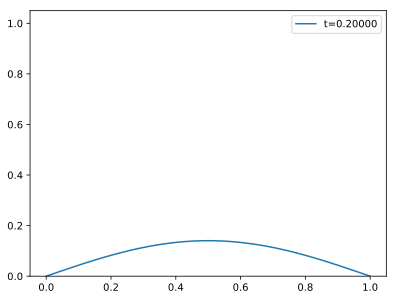

In [29]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+format("%.5f" % t_imp[k]))
    plt.legend();
    plt.ylim(0.0, 1.05)
    plt.savefig("TEMP_" + str(k) + ".png")

## Metode Crank-Nicholson

Metode Crank-Nicholson diperoleh dengan menggunakan rata-rata aproksimasi central difference antara titik waktu $k + 1$ dan $k$ sehingga diperoleh:

$$
\frac{\alpha}{2} \left(
\frac{u^{k+1}_{i+1} - 2u^{k+1}_{i} + u^{k+1}_{i-1}}{(\Delta x)^2} +
\frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

atau:
$$
ru^{k+1}_{i+1} - 2ru^{k+1}_{i} + ru^{k+1}_{i-1} + ru^{k}_{i+1} - 2ru^{k}_{i} + ru^{k}_{i-1} = 2u^{k+1}_{i} - 2u^{k}_{i}
$$

$$
-ru^{k+1}_{i+1} + 2(1 + r)u^{k+1}_{i} - ru^{k+1}_{i-1} = ru^{k}_{i+1} + 2(1 - r)u^{k}_{i} + ru^{k}_{i-1}
$$

Dalam bentuk matriks:
$$
\mathbf{A}\mathbf{u}^{k+1} = \mathbf{B}\mathbf{u}^{k}
$$

dengan matriks sebagai berikut.

$$
\mathbf{A} = 
\begin{bmatrix}
2(1 + r) & -r & 0 & \cdot & 0 & 0 \\
-r & 2(1 + r) & -r & \cdot & 0 & 0 \\
0 & -r & 2(1 + r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 + r) & -r \\
0 & 0 & 0 & \cdot & -r & 2(1 + r)
\end{bmatrix}
$$

$$
\mathbf{B} = 
\begin{bmatrix}
2(1 - r) & r & 0 & \cdot & 0 & 0 \\
r & 2(1 - r) & r & \cdot & 0 & 0 \\
0 & r & 2(1 - r) & \cdot & 0 & 0 \\
\cdot & \cdot & \cdot & \cdot & \cdot & \cdot \\
0 & 0 & 0 & \cdot & 2(1 - r) & r \\
0 & 0 & 0 & \cdot & r & 2(1 - r)
\end{bmatrix}
$$

$$
\mathbf{u}^{k} =
\begin{bmatrix}
u^{k}_{1} \\
u^{k}_{2} \\
u^{k}_{3} \\
\cdot \\
u^{k}_{M-1} \\
u^{k}_{M}
\end{bmatrix}
$$


### Implementasi

In [82]:
def heat_1d_CN( alpha, xf, tf, u0x, bx0, bxf, Nx, Nt ):
    
    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)

    u = np.zeros( (Nx+1, Nt+1) ) 

    # Aplikasi syarat awal
    for i in range(Nx+1):
        u[i,0] = u0x( x[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    r = alpha*dt/dx**2
    
    A = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        A[i,i] = 2*(1 + r)
        if i > 0:
            A[i-1,i] = -r
            A[i,i-1] = -r

    B = np.zeros( (Nx-1,Nx-1) )
    for i in range(Nx-1):
        B[i,i] = 2*(1 - r)
        if i > 0:
            B[i-1,i] = r
            B[i,i-1] = r
    
    for k in range(1,Nt+1):
        b = np.matmul(B, u[1:Nx,k-1] )
        u[1:Nx,k] = np.linalg.solve(A, b)
    
    return u, x, t

### Contoh

In [41]:
alpha = 1.0

xf = 1.0
tf = 0.2

Nx = 50
Nt = 200

u_CN, x_CN, t_CN = heat_1d_CN( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

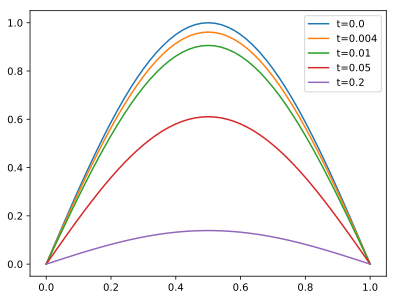

In [42]:
plt.clf()
plt.plot(x_CN, u_CN[:,0], label="t="+str(t_CN[0]))
plt.plot(x_CN, u_CN[:,4], label="t="+str(t_CN[4]))
plt.plot(x_CN, u_CN[:,10], label="t="+str(t_CN[10]))
plt.plot(x_CN, u_CN[:,50], label="t="+str(t_CN[50]))
plt.plot(x_CN, u_CN[:,-1], label="t="+str(t_CN[-1]))
plt.legend();

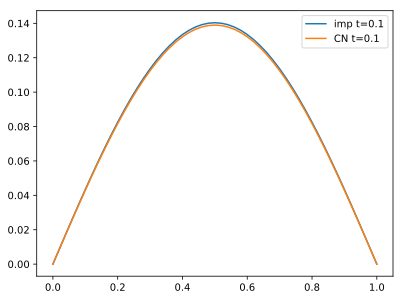

In [43]:
plt.clf()
plt.plot(x_imp, u_imp[:,-1], label="imp t="+str(t[-1]))
plt.plot(x_CN, u_CN[:,-1], label="CN t="+str(t[-1]))
plt.legend();

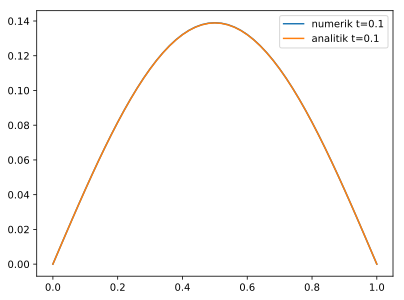

In [45]:
plt.clf()
plt.plot(x_CN, u_CN[:,-1], label="numerik t="+str(t[-1]))
plt.plot(x_CN, sol_01_analitik(x_CN, t_CN[-1]), label="analitik t="+str(t[-1]))
plt.legend();

## Latihan 1

Mirip dengan soal sebelumnya, hanya saja dengan syarat awal:

$$
u(x,0) = e^{-50(x-0.5)^2}
$$

In [83]:
# Syarat awal
def initial_temp( x ):
    return np.exp( -50*(x-0.5)**2 )

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

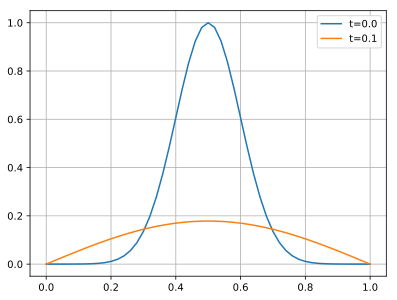

In [47]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.grid()
plt.legend()
#plt.plot( x_imp, u_imp[:,-1] )

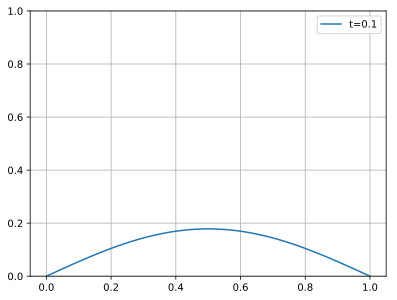

In [48]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+str(t_imp[k]) )
    plt.grid()
    plt.ylim(0,1)
    plt.legend()
    plt.savefig("TEMP_t_" + str(k) + ".png")

In [ ]:
anim = create_anim_2d( u_imp, x_imp, t_imp, 0.0, 1.1);

In [85]:
IPython.display.HTML( anim.to_html5_video() )

## Latihan 2

In [86]:
# Syarat awal
def initial_temp( x ):
    if x > 0.4 and x < 0.6:
        return 1.0
    else:
        return 0.0

# Syarat batas kiri
def bx0( t ):
    return 0.0

# Syarat batas kanan
def bxf( t ):
    return 0.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

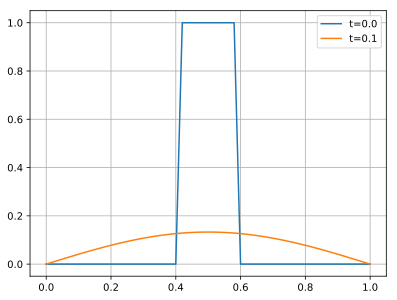

In [87]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.plot( x_imp, u_imp[:,-1], label="t="+str(t_imp[-1]) )
plt.grid()
plt.legend()

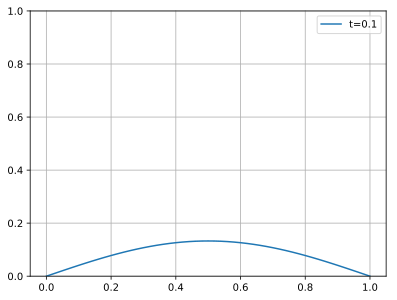

In [51]:
for k in range(Nt+1):
    plt.clf()
    plt.plot( x_imp, u_imp[:,k], label="t="+str(t_imp[k]) )
    plt.grid()
    plt.ylim(0,1)
    plt.legend()
    plt.savefig("TEMP_t_" + str(k) + ".png")

In [ ]:
anim = create_anim_2d( u_imp, x_imp, t_imp, 0.0, 1.1 );

In [89]:
IPython.display.HTML( anim.to_html5_video() )

Contoh lain, belum selesai

In [ ]:
# Syarat awal
def initial_temp( x ):
    return 100*x**2 + 100

# Syarat batas kiri
def bx0( t ):
    return 100.0

# Syarat batas kanan
def bxf( t ):
    return 200.0

alpha = 1.0

xf = 1.0
Nx = 50

tf = 0.1
Nt = 200

u_imp, x_imp, t_imp = heat_1d_euler_imp( alpha, xf, tf, initial_temp, bx0, bxf, Nx, Nt )

In [ ]:
# u(x=0) = 100
# u(x=1) = 200
# -x**2

In [ ]:
plt.clf()
x = np.linspace(0,1.0, 100)
plt.plot(x, 100 - (x - 0.5)**2)

In [ ]:
plt.clf()
plt.plot( x_imp, u_imp[:,0], label="t="+str(t_imp[0]) )
plt.grid()
plt.legend()

# Persamaan Kalor 2d

$$
\alpha \left( \frac{\partial^2}{\partial x^2} + \frac{\partial^2}{\partial y^2} \right) u(x,y,t)
= \frac{\partial}{\partial t} u(x,y,t)
$$

$$
\alpha \left(
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{(\Delta x)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{(\Delta y)^2}
\right) = 
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t}
$$

ADI = alternating direction implicit

# Persamaan Gelombang 1d

$$
c^2
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{\partial^2}{\partial t^2} u(x,t)
$$


$$
\frac{\partial^2}{\partial x^2} u(x,t) = 
\frac{1}{c^2} \frac{\partial^2}{\partial t^2} u(x,t)
$$

## Metode eksplisit untuk persamaan gelombang 1d

Persamaan gelombang:

$$
c^2 \frac{\partial^2}{\partial x^2} u(x,t) = \frac{\partial^2}{\partial t^2} u(x,t)
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas:
- $u(0,t) = b_{0}(t)$
- $u(x_{f},t) = b_{x_{f}}(t)$

Syarat awal:
- $u(x,0) = u_{0}(x)$
- $\left.\dfrac{\partial}{\partial t}u(x,t)\right|_{t=0} = u'_{0}(x)$

Gunakan centered difference untuk turuan kedua terhadap $x$ dan $t$:

$$
c^2 \frac{u^{k}_{i+1} - 2u^{k}_{i} + u^{k}_{i-1}}{(\Delta x)^2} =
\frac{u^{k+1}_{i} - 2u^{k}_{i} + u^{k-1}_{i}}{(\Delta t)^2}
$$

Dengan menggunakan definisi:

$$
r = c^2 \frac{(\Delta x)^2}{(\Delta t)^2}
$$

dapat dituliskan:

$$
u^{k+1}_{i} = r \left( u^{k}_{i+1} + u^{k}_{i-1} \right) + 
2(1 - r)u^{k}_{i} - u^{k-1}_{i}
$$

Untuk $k = 0$, kita memerlukan nilai untuk $u^{-1}_{i} = u(x_{i},-\Delta t)$:

$$
u^{1}_{i} = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - u^{-1}_{i}
$$

Dengan menggunakan aproksimasi centered diference untuk syarat awal:

$$
\frac{u^{1}_{i} - u^{-1}_{i}}{2\Delta t} = u'_{0}(x_{i})
$$

dapat diperoleh:

$$
u^{-1}_{i} = u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t
$$

Sehingga untuk $k = 0$, kita peroleh:

$$
\begin{align*}
u^{1}_{i} & = r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
2(1 - r)u^{0}_{i} - \left( u^{1}_{i} - 2u'_{0}(x_{i}) \Delta t \right) \\
u^{1}_{i} & = \frac{1}{2} r \left( u^{0}_{i+1} + u^{0}_{i-1} \right) + 
(1 - r)u^{0}_{i} + u'_{0}(x_{i}) \Delta t
\end{align*}
$$

Kondisi untuk stabilitas:

$$
r = c^2 \frac{(\Delta t)^2}{(\Delta x)^2} \leq 1
$$

### Implementasi

In [90]:
def wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    r = c2*(dt/dx)**2
    
    if r > 1.0:
        print("WARNING: propagasi tidak stabil")
        print("r = %f > 1\n" % r)
    
    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k]  = bx0( t[k] )
        u[Nx,k] = bxf( t[k] )
    
    for i in range(1,Nx):
        u[i,1] = 0.5*r*( u[i+1,0] + u[i-1,0] ) + (1.0 - r)*u[i,0] + dt*u0p( x[i] )
    
    for k in range(1,Nt):
        for i in range(1,Nx):
            u[i,k+1] = r*( u[i+1,k] + u[i-1,k] ) + 2*(1 - r)*u[i,k] - u[i,k-1]
    
    return u, x, t

### Contoh 1

In [91]:
def u0(x):
    return x*(1.0 - x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 4.0
Nt = 400
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

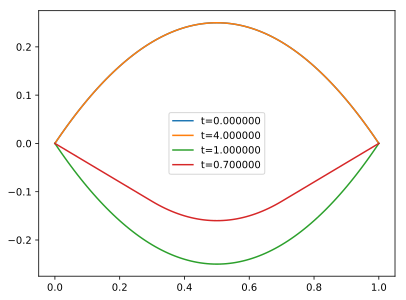

In [92]:
plt.clf()
for k in [0, -1, 100, 70]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend();

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-0.3,0.3)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

In [ ]:
anim = create_anim_2d( u, x, t, -0.5, 0.5 )

In [94]:
IPython.display.HTML( anim.to_html5_video() )

### Contoh 2

In [ ]:
def u0(x):
    return np.sin(5.0*np.pi*x)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

In [ ]:
plt.clf()
for k in [0]:
    plt.plot(x, u[:,k], label="t="+format("%f"%t[k]));
plt.legend();

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-1.05,1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

### Contoh 3

In [ ]:
def u0(x):
    return np.exp(-200*(x-0.5)**2)

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

In [ ]:
plt.clf()
plt.plot(x, u[:,0]);

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-1.05,1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

### Contoh 4

In [ ]:
def u0(x):
    if x > 0.25 and x < 0.5:
        return 4*x
    else:
        return 0.0

def u0p(x):
    return 0.0

def bx0(t):
    return 0.0

def bxf(t):
    return 0.0

c2 = 1.0
xf = 1.0
Nx = 100
tf = 2.0
Nt = 200
u, x, t = wave_1d_exp(c2, xf, tf, u0, u0p, bx0, bxf, Nx, Nt)

In [ ]:
plt.clf()
plt.plot(x, u[:,0]);

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(-0.55,0.55)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

# Persamaan Gelombang 2d

$$
c^2 \left( \frac{\partial^2 u(x,y,t)}{\partial x^2} + 
\frac{\partial^2 u(x,y,t)}{\partial y^2}
\right) = \frac{\partial^2 u(x,y,t)}{\partial t^2}
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq y \leq y_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas:
- $u(0,y,t) = b_{x_{0}}(y,t)$
- $u(x_{f},y,t) = b_{x_{f}}(y,t)$
- $u(x,0,t) = b_{y_{0}}(x,t)$
- $u(x,y_{f},t) = b_{y_{f}}(x,t)$

Syarat awal:
- $u(x,y,0) = u_{0}(x,y)$
- $\left| \dfrac{\partial u}{\partial t} \right|_{t=0} = u'_{0}(x,y)$

Gunakan central difference untuk turunan kedua:

$$
c^2 \left(
\frac{u^{k}_{i+1,j} - 2u^{k}_{i,j} + u^{k}_{i-1,j}}{\left(\Delta x\right)^2} +
\frac{u^{k}_{i,j+1} - 2u^{k}_{i,j} + u^{k}_{i,j-1}}{\left(\Delta y\right)^2} =
\frac{u^{k+1}_{i,j} - 2u^{k}_{i,j} + u^{k-1}_{i,j}}{\left(\Delta t\right)^2}
\right)
$$

Dapat diperoleh persamaan eksplisit berikut:

$$
u^{k+1}_{i,j} = r_{x} \left( u^{k}_{i,j+1} + u^{k}_{i,j-1} \right) +
r_{y} \left( u^{k}_{i+1,j} + u^{k}_{i-1,j} \right) + 2(1 - r_x - r_y ) u^{k}_{i,j} - u^{k-1}_{i,j}
$$

dengan: $r_{x} = c^2 \dfrac{(\Delta t)^2}{(\Delta x)^2}$ dan $r_{y} = c^2 \dfrac{(\Delta t)^2}{(\Delta y)^2}$.

Untuk kasus $k = 0$, kita memerlukan $u^{-1}_{i,j}$. Nilai ini dapat diaproksimasi dari:

$$
\frac{u^{1}_{i,j} - u^{-1}_{i,j}}{2\Delta t} = u'_{0}(x_{i},y_{j})
$$

sehingga diperoleh

$$
u^{1}_{i,j} = \frac{r_{x}}{2} \left( u^{0}_{i,j+1} + u^{0}_{i,j-1} \right) +
\frac{r_{y}}{2} \left( u^{0}_{i+1,j} + u^{0}_{i-1,j} \right) +
2(1 - r_x - r_y)u^{0}_{i,j} + u'_{0}(x_{i},y_{j})\Delta t
$$

Syarat untuk stabilitas adalah:

$$
r = \frac{4c^2 (\Delta t)^2}{(\Delta x)^2 + (\Delta y)^2} \leq 1
$$

## Implementasi

In [98]:
def wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt ):

    dx = xf/Nx
    x  = np.linspace(0.0, xf, Nx+1)
    
    dy = yf/Nx
    y  = np.linspace(0.0, yf, Ny+1) 
    
    dt = tf/Nt
    t  = np.linspace(0.0, tf, Nt+1)
    
    u  = np.zeros( (Nx+1,Ny+1,Nt+1) )
    
    for i in range(Nx+1):
        for j in range(Ny+1):
            u[i,j,0]  = u0( x[j], y[i] )
    
    # Syarat batas
    for k in range(Nt+1):
        for j in range(Ny+1):
            u[0,j,k]  = bx0( y[j], t[k] ) 
            u[Nx,j,k] = bxf( y[j], t[k] )
    
    for k in range(Nt+1):
        for i in range(Ny+1):
            u[i,0,k]  = by0( x[i], t[k] ) 
            u[i,Ny,k] = byf( x[i], t[k] )
    
    rx = c2*dt**2/dx**2
    ry = c2*dt**2/dy**2
    
    r = 4*c2*dt**2/(dx**2 + dy**2)
    
    if r >= 1.0:
        print("WARNING: r >= 1, solusi tidak stabil")
        print("r = ", r)
    
    k = 0
    for i in range(1,Nx):
        for j in range(1,Ny):
            u[i,j,k+1] = 0.5*( rx*(u[i,j+1,k] + u[i,j-1,k]) + ry*(u[i-1,j,k] + u[i+1,j,k]) ) + \
                         2*(1 - rx - ry)*u[i,j,k] + dt*u0p( x[i], x[j] )

    for k in range(1,Nt):
        for i in range(1,Nx):
            for j in range(1,Ny):
                u[i,j,k+1] = rx*(u[i,j+1,k] + u[i,j-1,k]) + \
                             ry*(u[i-1,j,k] + u[i+1,j,k]) + \
                             2*(1 - rx - ry)*u[i,j,k] - u[i,j,k-1]
                        
    return u, x, y, t

### Contoh 1

In [113]:
def u0(x,y):
    return 0.1*np.sin(np.pi*x)*np.sin(np.pi*y/2)

def u0p(x,y):
    return 0.0

def bx0(y,t):
    return 0.0

def bxf(y,t):
    return 0.0

def by0(x,t):
    return 0.0

def byf(x,t):
    return 0.0

c2 = 0.25
xf = 2.0
yf = 2.0
tf = 4.0

Nx = 40
Ny = 40
Nt = 80

u, x, y, t = wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt )

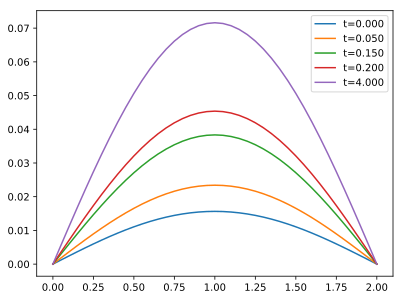

In [100]:
plt.clf()
for k in [0, 1, 3, 4, -1]:
    plt.plot( x, u[:,1,k], label="t="+format("%.3f"%t[k]) )
plt.legend();

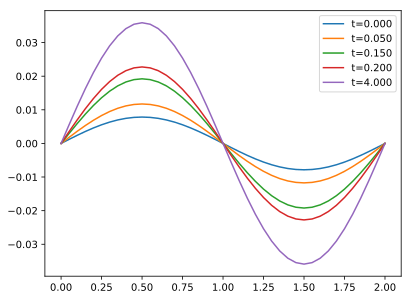

In [101]:
plt.clf()
for k in [0, 1, 3, 4, -1]:
    plt.plot( y, u[1,:,k], label="t="+format("%.3f"%t[k]) )
plt.legend();

In [114]:
X, Y = np.meshgrid(x,y);

<Figure size 640x480 with 0 Axes>

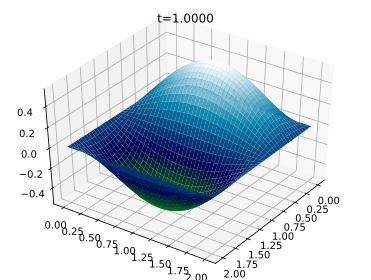

In [103]:
k = 20
plt.clf()
fig = plt.figure()
ax = fig.gca(projection="3d")
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="ocean", antialiased=False)
ax.set_title("t="+format("%.4f"%t[k]))
ax.view_init(elev=40., azim=35)

In [ ]:
for k in range(Nt+1):
    plt.clf()
    fig = plt.figure();
    ax = fig.gca(projection="3d");
    surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="jet", antialiased=False);
    ax.set_title("t="+format("%.4f"%t[k]));
    ax.set_zlim(-0.5, 0.5);
    #ax.view_init(elev=40., azim=45)
    plt.savefig("TEMP_" + str(k) + ".png", dpi=150);

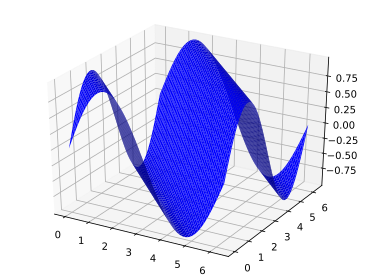

In [107]:
def gen_surf_data(i, z, line):
    z = np.sin(x+y+i)
    #ax.clear()
    line = ax.plot_surface(x, y, z,color= 'b')
    return line,

n = 2.*np.pi
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = np.linspace(0,n,100)
y = np.linspace(0,n,100)
x,y = np.meshgrid(x,y)
z = np.sin(x+y)
line = ax.plot_surface(x, y, z,color= 'b')

ani = animation.FuncAnimation(fig, gen_surf_data, fargs=(z, line), interval=30, blit=False)

In [131]:
def create_anim_surf3d(Z, X, Y, t, zmin, zmax):
    
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    def gen_surf_data(k, Z, line):
        ax.clear()
        line = ax.plot_surface(X, Y, Z[:,:,k], linewidth=2, cmap="jet", antialiased=False)
        ax.set_zlim(zmin, zmax)
        ax.set_title("t="+format("%.4f"%t[k]))
        return line,
    
    line = ax.plot_surface(X, Y, Z[:,:,0], linewidth=2, cmap="jet", antialiased=False)
    ax.set_title("t="+format("%.4f"%t[0]))
    
    anim = animation.FuncAnimation(fig, gen_surf_data, fargs=(Z, line),
                                   interval=len(t), frames=len(t), blit=False)
    
    return anim

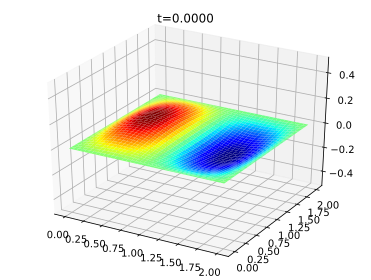

In [132]:
anim = create_anim_surf3d(u, X, Y, t, -0.5, 0.5)

In [133]:
IPython.display.HTML(anim.to_html5_video())

In [121]:
t.shape

(81,)

In [123]:
u.shape

(41, 41, 81)

### Contoh 2

In [ ]:
def u0(x,y):
    return np.exp(-30*( (x-1.0)**2 + (y-1.0)**2 ))

def u0p(x,y):
    return 0.0

def bx0(y,t):
    return 0.0

def bxf(y,t):
    return 0.0

def by0(x,t):
    return 0.0

def byf(x,t):
    return 0.0

c2 = 0.25
xf = 2.0
yf = 2.0
tf = 16.0

Nx = 50
Ny = 50
Nt = 320

u, x, y, t = wave_2d_exp( c2, xf, yf, tf, u0, u0p, bx0, bxf, by0, byf, Nx, Ny, Nt )

In [ ]:
X, Y = np.meshgrid(x,y)
k = -1
plt.clf()
fig = plt.figure()
ax = fig.gca(projection="3d")
ax = fig.gca(projection="3d")
surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="jet", antialiased=False)
ax.set_title("t="+format("%.4f"%t[k]))
ax.view_init(elev=0., azim=20)

In [ ]:
for k in range(Nt+1):
    plt.clf()
    fig = plt.figure();
    ax = fig.gca(projection="3d");
    surf = ax.plot_surface(X, Y, u[:,:,k], linewidth=2, cmap="jet", antialiased=False);
    ax.set_title("t="+format("%.4f"%t[k]));
    ax.set_zlim(-1.5, 1.5);
    ax.view_init(elev=0., azim=20)
    plt.savefig("TEMP_" + str(k) + ".png", dpi=150);

### Travelling wave

In [ ]:
def travel_wave(A, k, omega, x, t):
    return A*np.cos(omega*t - k*x)

In [ ]:
x0 = 0.0
xf = 2.0
x = np.linspace(x0, xf, 500)
A = 1.0
λ = 1.0
k = 2*np.pi/λ
T = 1.0
omega = 2*np.pi/T

t0 = 0.0
Nt = 200
delta_t = 0.01
for i in range(Nt):
    plt.clf()
    t = t0 + i*delta_t
    plt.plot(x, travel_wave(A, k, omega, x, t), label="t="+format("%.2f" % t))
    plt.ylim(-1.0, 1.0)
    plt.legend(loc="upper right")
    plt.savefig("TEMP_" + str(i) + ".png")

# Persamaan Laplace dan Poisson

Biasanya hanya bergantung pada variable spasial.

Persamaan Poisson:
$$
\nabla^2 u(x,y) = f(x,y)
$$

Persamaan Laplace:
$$
\nabla^2 u(x,y) = 0
$$

Untuk dua dimensi (spasial):

$$
\frac{\partial^2}{\partial x^2} u(x,y) +
\frac{\partial^2}{\partial y^2} u(x,y)
= f(x,y)
$$

Gunakan notasi:

- $u(x,y) = u_{i,j}$

- $u(x+\Delta x, y) = u_{i+1,j}$

- $u(x-\Delta x, y) = u_{i-1,j}$

- $u(x, y + \Delta y) = u_{i,j+1}$

- $u(x, y - \Delta y) = u_{i,j-1}$


Aproksimasi centered difference untuk turunan kedua:

$$
\frac{ u_{i+1,j} - 2u_{i,j} + u_{i-1,j} }{\Delta x^2} +
\frac{ u_{i,j+1} - 2u_{i,j} + u_{i,j-1} }{\Delta y^2} =
f_{i,j}
$$

Persamaan ini dapat dituliskan menjadi sistem persamaan linear:

$$
\mathbf{A} \mathbf{u} = \mathbf{f}
$$

# Persamaan adveksi (konveksi)

$$
\frac{\partial}{\partial t} u(x,t) + v \frac{\partial}{\partial x} u(x,t) = 0
$$

Domain:
- $0 \leq x \leq x_{f}$
- $0 \leq t \leq t_{f}$

Syarat batas (hanya pada bagian kiri):
- $u(0,t) = U_{0}$

Syarat awal:
- $u(x,0) = u^{0}(x)$

## Metode eksplisit

$$
\frac{u^{k+1}_{i} - u^{k}_{i}}{\Delta t} + v \frac{ u^{k}_{i+1} - u^{k}_{i-1} }{2\Delta x} = 0
$$

$$
u^{k+1}_{i} - u^{k}_{i} + v \frac{\Delta t}{2\Delta x} \left( u^{k}_{i+1} - u^{k}_{i-1} \right) = 0
$$

$$
u^{k+1}_{i} = u^{k}_{i} - \frac{1}{2} C \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

$$
C = v \frac{\Delta t}{\Delta x}
$$

### Implementasi

In [ ]:
def advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    # bilangan Courant
    C = v*dt/dx
    
    print("C = %f" % C)

    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
        
    # Syarat batas
    for k in range(Nt+1):
        u[0,k] = bx0( t[k] )
    
    for k in range(Nt):
        for i in range(1,Nx):
            u[i,k+1] = u[i,k] - 0.5*C*( u[i+1,k] - u[i-1,k] )
            #print("u = %d %d %18.10f" % (i, k+1, u[i,k+1]))
    
    return u, x, t

### Contoh

In [ ]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.2
Nx = 50
Nt = 1500

u, x, t = advect_1d_exp(v, xf, tf, u0, bx0, Nx, Nt )

In [ ]:
plt.clf()
plt.plot(x, u[:,0])
plt.plot(x, u[:,-1]);

In [ ]:
for k in range(Nt+1):
    plt.clf()
    plt.plot(x, u[:,k], label="t="+format("%.2f" % t[k]))
    plt.ylim(0.0, 1.05)
    plt.legend()
    plt.savefig("TEMP_" + str(k) + ".png")

## Metode Leapfrog

$$
\frac{u^{k+1}_{i} - u^{k-1}_{i}}{2\Delta t} + v \frac{u^{k}_{i+1} - u^{k}_{i-1}}{2\Delta x} = 0
$$

$$
u^{k+1}_{i} = u^{k-1}_{i} - C \left( u^{k}_{i+1} - u^{k}_{i-1} \right)
$$

Kondisi untuk stabilitas:

$$
C \leq 1
$$

atau

$$
\Delta t \leq \frac{\Delta x}{v}
$$

In [ ]:
def advect_1d_leapfrog(v, xf, tf, u0, bx0, Nx, Nt ):

    dx = xf/Nx
    x = np.linspace(0.0, xf, Nx+1)
    
    dt = tf/Nt
    t = np.linspace(0.0, tf, Nt+1)
    
    # bilangan Courant
    C = v*dt/dx
    
    print("dt = ", dt)
    print("dx = ", dx)
    print("C = %f" % C)

    u = np.zeros( (Nx+1,Nt+1) )
    
    # Syarat awal
    for i in range(Nx+1):
        u[i,0] = u0( x[i] ) 
    
    for i in range(1,Nx):
        u[i,1] = u[i,0] + v*dt/dx*( u[i+1,0] - u[i,0] )
    
    for k in range(1,Nt):
        for i in range(1,Nx):
            u[i,k+1] = u[i,k-1] - C*( u[i+1,k] - u[i-1,k] )
    
    return u, x, t

### Contoh

In [ ]:
def u0(x):
    return np.exp( -150*(x-0.2)**2 )

def bx0(t):
    return 0.0

v = 1.0
xf = 1.0
tf = 0.4
Nx = 100
Nt = 1000

u, x, t = advect_1d_leapfrog(v, xf, tf, u0, bx0, Nx, Nt )

In [ ]:
plt.clf()
for k in [0, 1, 2, 4, -1]:
    plt.plot(x, u[:,k], label="t="+format("%.4f"%t[k]))
plt.legend();

# Old (kuliah 14 April 2019)

Rentang x = 0 sampai dengan x = 1, dengan selang diskritisasi h = 0.25

In [ ]:
h = 0.25
A = 0.0
B = 1.0
Nx = int( (B-A)/h ) + 1
Nx

In [ ]:
x = np.linspace(A,B, Nx)
x

Waktu t = 0 sampai dengan t = 1, dengan selang k = 0.25

In [ ]:
k = 0.025
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
Nt

Array suhu, dua dimensi

In [ ]:
T = np.zeros( (Nx,Nt) )

Aplikasi syarat batas t = 0 (atau syarat awal)

$$
T(x, t=0) = \sin(\pi x )
$$

In [ ]:
T[:,0] = np.sin(np.pi * x)

In [ ]:
plt.clf()
plt.plot(x, T[:,0], marker="o")
plt.text( 0.0, 1.0, "t = 0")

Metode eksplisit
$$
T(x,t+k) = \lambda T(x-h,t) + (1-2\lambda)*T(x,t) + \lambda T(x+h,t)
$$


In [ ]:
λ = k/h**2
λ

Mulai time-stepping dari t = 0 ke t selanjutnya t = 0 + k = k

In [ ]:
# T[i,t] adalah T[xi,t]
idx_time = 1
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

In [ ]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.025")

In [ ]:
# T[i,t] adalah T[xi,t]
idx_time = 2
for i in range(1,Nx-1):
    T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

In [ ]:
plt.clf()
plt.plot(x, T[:,idx_time], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.05")

Untuk semua waktu, gunakan loop

In [ ]:
for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

Misalkan kita ingin mengetahui distribusi suhu pada t = 0.5, atau indeks t = 20

In [ ]:
t = k*20
t

In [ ]:
plt.clf()
plt.plot(x, T[:,20], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.5")

In [ ]:
plt.clf()
plt.plot(x, T[:,10], marker="o")
plt.ylim(0,1)
plt.text( 0.0, 0.9, "t = 0.25")

In [ ]:
def my_gaussian(x, center, alpha):
    return np.exp( -alpha*(x - center)**2 )

In [ ]:
h = 0.05
A = 0.0
B = 1.0
center = 0.5
alpha = 1000
Nx = int( (B-A)/h ) + 1
print("Nx = ", Nx)
x = np.linspace(A, B, Nx)

k = 0.001
tmin = 0.0
tmax = 1.0
Nt = int( (tmax-tmin)/k ) + 1
print("Nt = ", Nt)

t = np.linspace(tmin, tmax, Nt)

T = np.zeros( (Nx,Nt) )

# Syarat awal
T[:,0] = np.sin(np.pi*x)**2

plt.clf()
plt.plot(x, T[:,0])
plt.text(0, 0.9, "t = 0")

In [ ]:
λ = k/h**2
print("λ = ", λ)

for idx_time in range(1,Nt):
    for i in range(1,Nx-1):
        T[i,idx_time] = λ*T[i-1,idx_time-1] - (1 - 2*λ)*T[i,idx_time-1] + λ*T[i+1,idx_time-1]

In [ ]:
plt.clf()
plt.plot(x, T[:,1])
plt.ylim(0,1)
plt.text(0, 0.9, "t = 0.0001")

In [ ]:
my_gaussian(0.0, center, alpha)